# 2.4 - Loading, indexing, analyzing data

### Learning goals for today
1. Understand how to load, index and query data using Pandas
2. Do simple qPCR calculations to reproduce published analysis
3. Use numpy to do simple polynomial curve fitting


---
### How to use this notebook during class
- Follow along as we go
- Use your **Cards** to indicate where you're at:
    - A **🟩Green card** means you are caught up with Max and **ready to help your classmates**
    - A **🟥Red card** means you are stuck and need help
- <span style='color:red;'>EXERCISE</span> — work on this problem by yourself, or try with a partner if you get stuck
---


First let's import some libraries we will use today. Remember if you don't have a library installed you can pip install it with:

!pip install *package_name*

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [8]:
!pip install numpy
!pip install pandas
!pip install seaborn

## 1) Exploratory data analysis with Pandas and seaborn
Let's use pandas to load our first dataset and look at it

Pandas uses a datatype called a **DataFrame**

A **DataFrame** is just a matrix with labels for the rows (called indices) and columns (called columns)

In [14]:
rivers_data = pd.read_csv('global_rivers_dataset.csv', index_col=0)
rivers_data

,river_length_km,source_lat,source_lon,mouth_lat,mouth_lon,countries_passed,continent,main_country,length_category
river_name,,,,,,,,,
Rungwa,302.552145,-8.038326e+05,3.562224e+06,-8.038435e+05,3.562224e+06,United Republic of Tanzania,Africa,United Republic of Tanzania,Short
Ligonha,339.003357,-1.892915e+06,4.355690e+06,-1.703609e+06,4.160865e+06,Mozambique,Africa,Mozambique,Short
Dongwe,259.307674,-1.630475e+06,2.842354e+06,-1.559692e+06,2.664439e+06,Zambia,Africa,Zambia,Short
Cuito,764.221869,-2.024344e+06,2.309879e+06,-1.419870e+06,2.041473e+06,"Angola, Namibia",Africa,Angola,Medium
Bagoé,466.222413,1.042907e+06,-7.730508e+05,1.296021e+06,-7.303820e+05,"Ivory Coast, Mali",Africa,Mali,Short
...,...,...,...,...,...,...,...,...,...
Madison,355.672715,5.553616e+06,-1.236743e+07,5.571417e+06,-1.239100e+07,United States of America,North America,United States of America,Short
Missouri,1404.293609,5.855916e+06,-1.243409e+07,5.291908e+06,-1.097161e+07,United States of America,North America,United States of America,Medium
Missouri,3116.666261,6.009285e+06,-1.204372e+07,4.668994e+06,-1.003357e+07,United States of America,North America,United States of America,Long


Pandas makes it easy to query dataframes and select subsets of the data. 

Note that querying returns another **dataframe**

In [15]:
rivers_data.query('main_country == "France"')

,river_length_km,source_lat,source_lon,mouth_lat,mouth_lon,countries_passed,continent,main_country,length_category
river_name,,,,,,,,,
Litani,225.500715,2.853279e+05,-6.116441e+06,4.021709e+05,-6.016911e+06,"France, Suriname",Europe,France,Short
Vienne,434.751724,5.702403e+06,2.204376e+05,5.946389e+06,8.392446e+03,France,Europe,France,Short
Durance,375.724863,5.579095e+06,7.437425e+05,5.425307e+06,5.301808e+05,France,Europe,France,Short
Tarn,377.608870,5.469603e+06,3.991032e+05,5.448541e+06,1.145269e+05,France,Europe,France,Short
Marne,550.400517,6.054744e+06,6.019841e+05,6.211541e+06,2.681887e+05,France,Europe,France,Medium
Dordogne,524.771896,5.576972e+06,2.013752e+05,5.578032e+06,2.013752e+05,France,Europe,France,Medium
Maas,1098.134295,6.075307e+06,6.239707e+05,6.718541e+06,5.698221e+05,"Belgium, France, Germany, Netherlands",Europe,France,Medium
Yonne,325.585203,5.917330e+06,4.416905e+05,6.141164e+06,3.296101e+05,France,Europe,France,Short
Doubs,577.034664,5.853654e+06,6.846312e+05,5.883738e+06,5.511511e+05,"France, Switzerland",Europe,France,Medium


You can also use pandas to calculate simple statistics

In [24]:
rivers_data['river_length_km'].max(axis=0)

np.float64(8546.624428722293)

### <span style='color:red;'>EXERCISE 1</span>: COMPUTE STUFF WITH PANDAS (10 min)
Work on your own for a bit. Then consult with classmates

Use pandas to compute:
1. The median length of rivers in Europe
2. The 5 longest rivers in the United States of America - look up the pandas function **sort_values**
3. The river that goes through the most countries

In [29]:
rivers_data.query('continent == "Europe"')

,river_length_km,source_lat,source_lon,mouth_lat,mouth_lon,countries_passed,continent,main_country,length_category
river_name,,,,,,,,,
Tura,1264.982015,8.014325e+06,6.611443e+06,7.769897e+06,7.453688e+06,Russia,Europe,Russia,Medium
Bol’shoy Yugan,954.602789,8.078556e+06,8.365268e+06,8.597514e+06,8.169579e+06,Russia,Europe,Russia,Medium
Vasyugan,1179.863394,7.762761e+06,8.688758e+06,8.169783e+06,8.983939e+06,Russia,Europe,Russia,Medium
Markha,2418.950795,9.868274e+06,1.239383e+07,9.182113e+06,1.323376e+07,Russia,Europe,Russia,Long
Selemdzha,873.260768,6.867470e+06,1.497239e+07,6.719884e+06,1.434673e+07,Russia,Europe,Russia,Medium
...,...,...,...,...,...,...,...,...,...
White Sea Canal,694.446304,9.373067e+06,3.824126e+06,9.004863e+06,3.870880e+06,Russia,Europe,Russia,Medium
Kovzha River,258.729130,8.420681e+06,4.152763e+06,8.610991e+06,4.039087e+06,Russia,Europe,Russia,Short
Kovzha River,56.050571,8.411196e+06,4.156255e+06,8.622628e+06,3.997014e+06,Russia,Europe,Russia,Short


In [35]:
europe_rivers= rivers_data.query('continent == "Europe"')
europe_rivers['river_length_km'].max()

np.float64(8546.624428722293)

In [36]:
rivers_data.query('continent == "Europe"')['river_length_km'].median()

np.float64(586.6375538156647)

We can use **seaborn** to make all kinds of plots using dataframes

In [37]:
rivers_data.query('main_country' == "United States of America"')

SyntaxError: unmatched ')' (3423954832.py, line 1)

### <span style='color:red;'>EXERCISE 2</span>: MAKE A SEABORN PLOT (5 min)
Use the seaborn documentation/documentation to make a new plot from this dataframe that shows something interesting

https://seaborn.pydata.org/examples/index.html

In [40]:
num = [len(x.split(',')) for x in rivers_data['countries_passed']]
rivers_data['num_countries'] = num
rivers_data.sort_values(by='num_countries', ascending=False)

,river_length_km,source_lat,source_lon,mouth_lat,mouth_lon,countries_passed,continent,main_country,length_category,num_countries
river_name,,,,,,,,,,
Zambezi,2379.346474,-1.266716e+06,2.701226e+06,-2.118523e+06,4.022460e+06,"Angola, Botswana, Democratic Republic of the C...",Africa,Zambia,Long,7
Danube,2421.237041,6.085226e+06,1.915413e+06,5.627572e+06,3.200098e+06,"Bulgaria, Croatia, Hungary, Republic of Serbia...",Europe,Romania,Long,6
Niger,4589.678489,1.713803e+06,-4.434217e+05,6.135683e+05,7.307788e+05,"Guinea, Mali, Niger, Nigeria, Sierra Leone",Africa,Mali,Long,5
Chari,939.598509,9.809883e+05,2.102378e+06,1.343249e+06,1.674413e+06,"Cameroon, Central African Republic, Chad, Nige...",Africa,Chad,Medium,5
Maas,1098.134295,6.075307e+06,6.239707e+05,6.718541e+06,5.698221e+05,"Belgium, France, Germany, Netherlands",Europe,France,Medium,4
...,...,...,...,...,...,...,...,...,...,...
Chubut,1003.430078,-5.343103e+06,-7.893199e+06,-5.396503e+06,-7.398009e+06,Argentina,South America,Argentina,Medium,1
Jequitinhonha,839.030692,-2.058541e+06,-4.832212e+06,-1.775333e+06,-4.326132e+06,Brazil,South America,Brazil,Medium,1
Kafue,1262.402838,-1.294586e+06,3.023074e+06,-1.787971e+06,3.222275e+06,Zambia,Africa,Zambia,Medium,1


River lengths are all positive values and span several orders of magnitude. Lots of natural measurements are approximately log-normally distributed. Let's see if river lengths is one of them

First we'll plot the histrogram of log transformed river lengths, then we'll fit a lognormal distribution

<Axes: xlabel='continent', ylabel='river_length_km'>

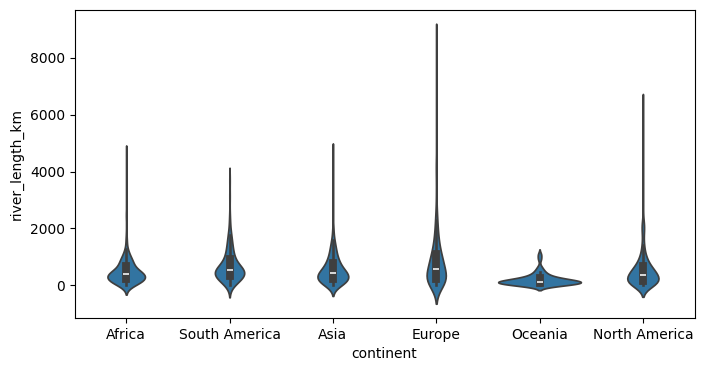

In [43]:
fh, ax = plt.subplots(1, 1, figsize=(8,4))
sns.violinplot(data=rivers_data, x='continent', y='river_length_km',
ax=ax)

<Axes: xlabel='continent', ylabel='num_countries'>

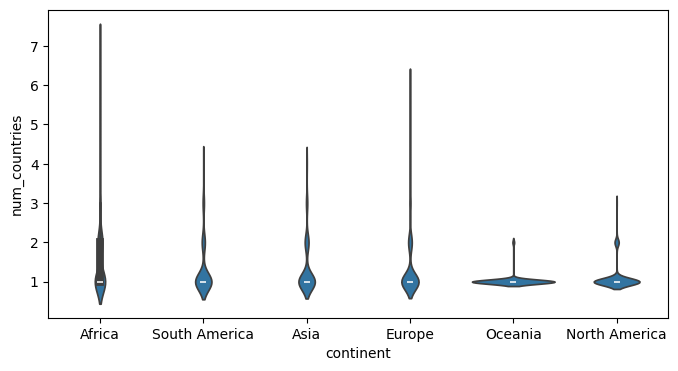

In [47]:
fh, ax = plt.subplots(1, 1, figsize=(8,4))
sns.violinplot(data=rivers_data, x='continent', y='num_countries',
ax=ax)

<Axes: xlabel='river_length_km', ylabel='Density'>

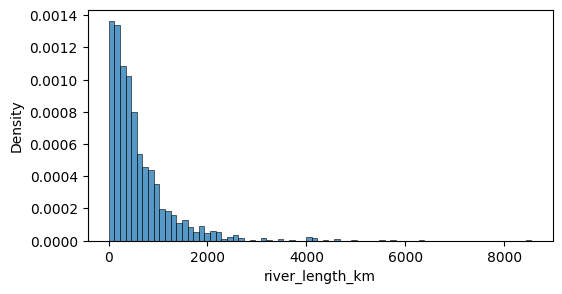

In [51]:
fh, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.histplot(data=rivers_data,
             x='river_length_km', stat='density',
             ax=ax)

## 2) RT qPCR analysis

We're going to do a simple example analysis on some RT qPCR data

I sort of randomly selected the qPCR data here:

https://figshare.com/articles/dataset/qPCR_data_xlsx/13079537?file=25034471

which is from this paper:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0243626


The data are Ct (cycle threshold) values. Smaller Ct values means more transcripts are present in the sample. We are going to use Pandas to do some standard qPCR calculations:
1. Average across technical replicates
2. Compute $\Delta$Ct by subtracting the Ct values for the endogenous control, Gapdh
3. Compute $\Delta$$\Delta$Ct by subtracting the $\Delta$Ct values for the uninjected control from each sample's $\Delta$Ct value
4. Compute the relative expression levels for experimental conditions vs. controls

Let's use pandas group / aggregation functions to take the mean across technical replicates

Now let's use pandas sub function to subtract the baseline Gapdh from each column to get delta_ct

To compute $\Delta$$\Delta$Ct, let's compare to the average of the controls

We'll start by indexing into aggregated_ct to get the rows that correspond to the controls, then averaging them

Last, let's compute the relative quantity of each transcript

relative expression = 2*$\Delta$Ct_gene_of_interest / 2*$\Delta$Ct_ref = 2^$\Delta \Delta$ Ct

i.e. how many times more transcripts are there of your gene than the control


### <span style='color:red;'>EXERCISE 3</span>: REPRODUCE THE FIGURES IN THE PAPER (10 min)
Look up the documentation for seaborn **barplot** to reproduce one of the panels from Figure 4B or C in the paper using the dataframe **relative_quantity**

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0243626

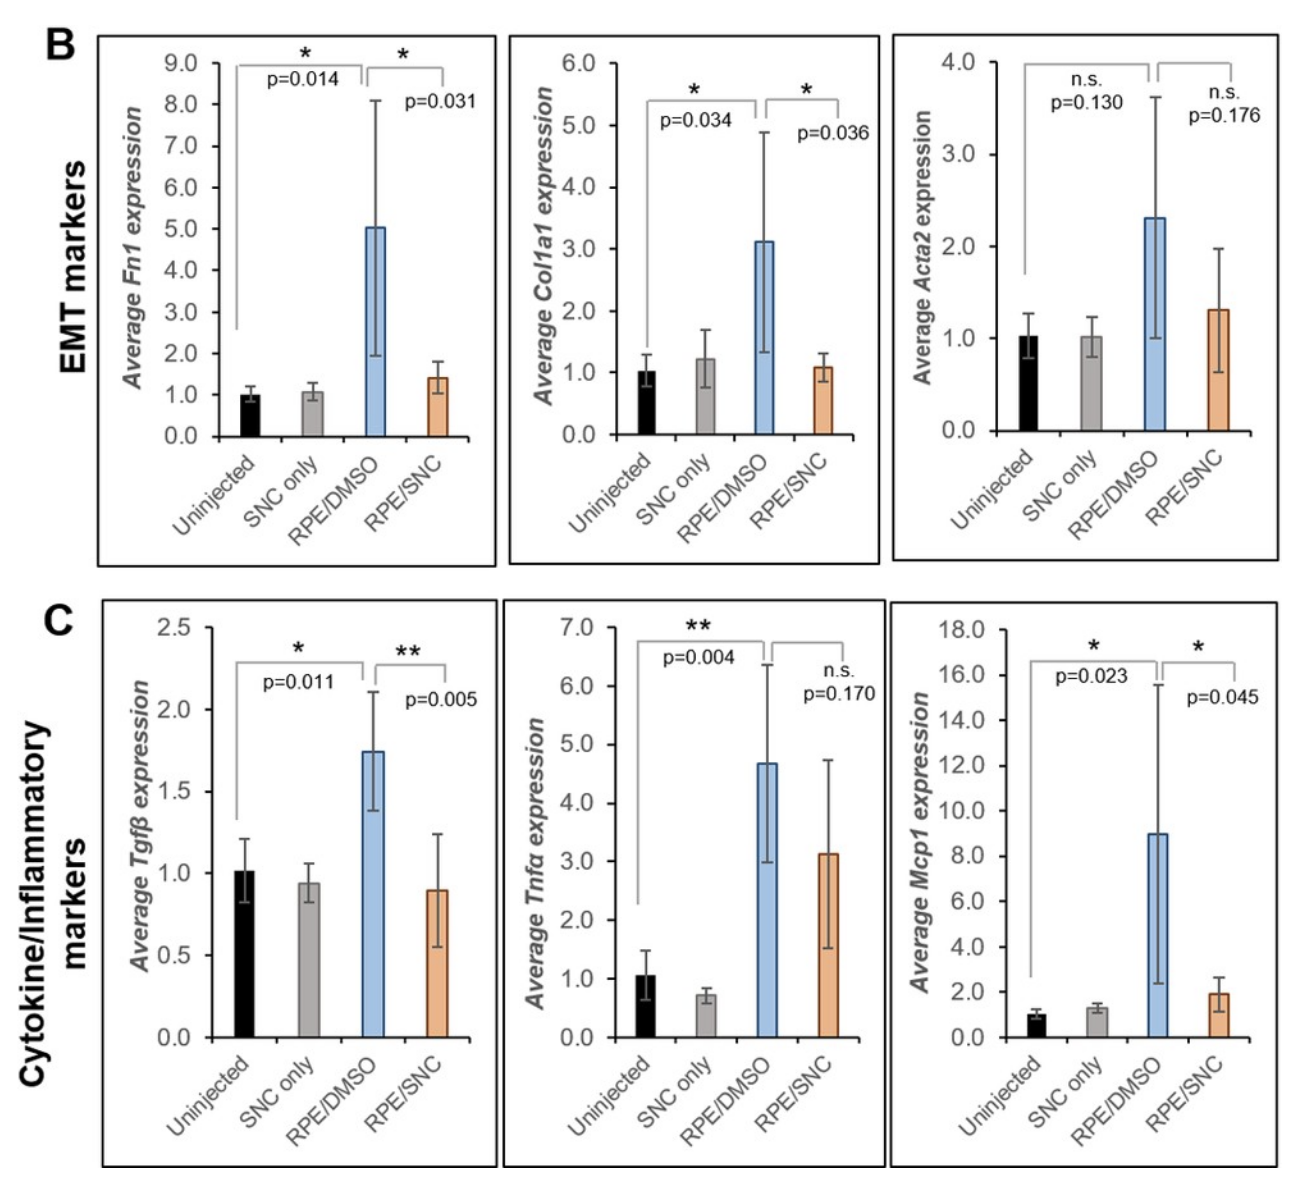

Let's see how to plot all the panels. This is a small preview of something we'll touch on again in a future class, called a **for-loop**

## 3) Curve fitting: Modeling bacterial growth

You are growing E. coli in a flask, and you measure optical density of the bacterial suspension using a spectrophotometer every 30 minutes for 5 hours.
The optical density is directly related to the number of bacteria in the suspension

In [ ]:
time_points = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
optical_density = [30, 45, 92, 198, 404, 838, 1705, 3120, 3780, 4100, 4400]

Let's plot the data using **pyplot**


Part of this growth curve is the **exponential phase**, where the number of bacteria double at regular intervals. This interval is called the doubling time

**N(t) = N_0 * 2^(t/T_d)**
- N(t) is the number of bacteria as a function of time, t
- N_0 is the initial number of bacteria
- T_d is the doubling time


Let's transform our optical density by log2...
This makes our equation

Log2(N(t)) = Log2(N_0) + t/T_D

which is linear, of the form Y = mx + b, where the **slope m = 1/T_d**


Now we're going to fit a line to our log-transformed data to estimate the doubling time. First note that the exponential phase is between about 0.5 and 3 hours...